In [1]:
# One of the way to build keras model is by using sequential API. 
# Sequential API allows models to be built layer by layer
# In this problem we have 8 input neurons-12 hidden neurons-8 hidden 
# neurons-1 output neurons, i.e 4 layers
from keras.models import Sequential
# Since these 4 layers are connected, thus we use Dense class
from keras.layers import Dense
from keras import optimizers
from keras import metrics
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image, ImageFilter
import numpy as np
import os
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# 768 observation and 9 variables
features_and_targets = np.loadtxt('pima-indians-diabetes.csv',delimiter=',')
np.random.shuffle(features_and_targets)

# Features(first 8 variables) and Targets(last variables) are assigned 
# to X and Y.
X = features_and_targets[:,0:8]
Y = features_and_targets[:,8]

## 150 Epochs----------------------------------------------------------------------

In [3]:
# np.random.seed(7) will produce the same set of network weights 
np.random.seed(7)

# building keras model using sequential API
model = Sequential()

# adding 1st hidden layer which has 12 nuerons, input layer has 8 nuerons,
# for 8 variables in 'X' dataset. The inputs are specifically mentioned 
# by using "input_dim" argument.
# activation function "relu" is used.
# The addition of product of inputs and the random weights of all the layers
# below will passed through the respective activation function.
model.add(Dense(12, input_dim=8, activation='relu'))

# adding 2nd hidden layer with 8 nuerons and passing it thtough relu function.
# The "relu" will predict the output from the 2nd hidden layer in 1 or 0. 
model.add(Dense(8, activation='relu'))

# adding 3rd hidden/output layer which has 1 neurons, the activation
# function used here is "sigmoid" which predicts the targets, ie. "Y"
# by values between 1 and 0
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0001)
# Adam optimizer default learning rate is 0.001.

# after adding all the layers to the model, compiling them together with
# additional properties such as loss "binary_crossentropy" , 
# gradient descent optimizer called "adam". The predicted observations 
# from the sigmoid activation function will be used to compute 
# loss = -{(y\log(p) + (1 - y)\log(1 - p))}, where log is the natural log, 
# y is binary indicator (0 or 1) and p is predicted probability. Further 
# the weights will be reduced by optimizer till the loss is low or until
# the specified epochs are completed. Metric allows to monitor the model while 
# training. accuracy value and loss is generated for each epoch in verbose output.
# compiling the model involves Tensorflow at backend using which the weights are
# evaluated and the predictions are made.
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# The model created above will be now trained with data using fit() function.
# For every epoch the loss will be decreased to its minimum.
# verbose = 0 turns off the output progress bars during training
one_fifty_history = model.fit(X, Y, epochs=150, verbose=0)

# evaluate() function is used to check how the model will perform
# on the test data set, here we will evaluate with the same dataset passed in
# while training the model.When the score are printed in the output
# it shows the values of overall [loss, accuracy] of the model
scores = model.evaluate(X, Y)

# predict() function is used for predicting the targets of the new dataset if any.
# here we will just predict for the features dataset we have and check its accuracy
# in the output below
Y_predict = model.predict(X)

# model.metrics_names[0:2] has first element "loss" and 2nd "accuracy"
# where as scores 2nd element is loss and we are printing the same.
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

# round() function rounds off the number to the nearest integer. 
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')

#confusion matrix is used to evaluate the quality of the output of the model.
#The diagonal elements represent the number of points for which the predicted 
#label is equal to the true label, while off-diagonal elements are those that 
#are mislabeled by the model.
print('')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 68us/step

acc: 72.79%

loss: 59.93%

Confusion Matrix
True negatives:  418
False negatives:  127
False positives:  82
True positives:  141


In [4]:
418+127+82+141 
# in 768 total predicted values, 418+141 were correctly 
# predicted however, 127+82 were incorrectly predicted

768

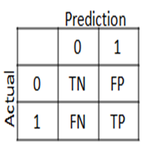

In [45]:
conf_matrix = Image.open('conf_matrix.png') 
cm = conf_matrix.resize((150,150),Image.ANTIALIAS)
cm

[0.5993209903438886, 0.7278645833333334]


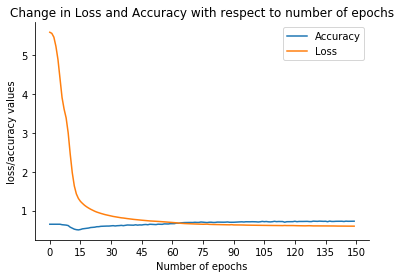

In [5]:
print(scores)
acc_onefifty = one_fifty_history .history['acc']
loss_onefifty= one_fifty_history .history['loss']
epoch = range(0,151)
ax = plt.subplot(111)
ax.plot(acc_onefifty, label="Accuracy")
plt.legend()
ax.plot(loss_onefifty, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,15))
plt.show()
# The plot shows the model has increase in accuracy from approximately 
# 0.5 to 0.72(i.e 50% to 72% in 150epoch)
# and loss reduces from approximately 5.8 to 0.6 during 
# the training process for 150 epochs. 

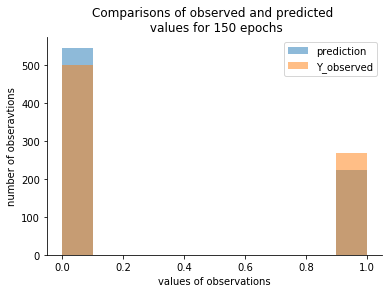

In [6]:
ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
ax.legend()
plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
ax.legend()
plt.xlabel("values of observations")
plt.ylabel("number of obseravtions")
plt.title("Comparisons of observed and predicted \n values for 150 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# The prediction which are closer to 1's and 0's are plotted over 
# Y_observed. 72% are predicted close/equal to actual values

## 5000 Epochs----------------------------------------------------------------------

In [10]:
np.random.seed(7)
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
five_thousand_history = model.fit(X, Y, epochs=5000, verbose=0)
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 125us/step

acc: 79.56%

loss: 41.73%

Confusion Matrix
True negatives:  449
False negatives:  106
False positives:  51
True positives:  162


[0.41730467478434247, 0.7955729166666666]


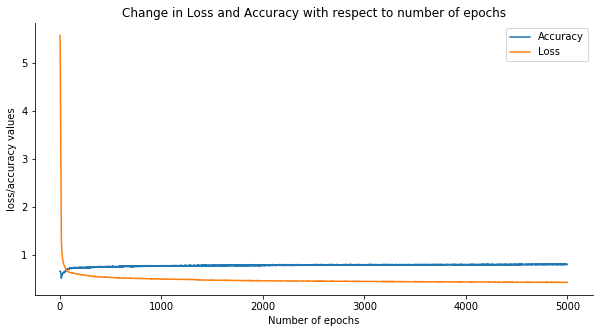

In [11]:
print(scores)
acc_five_thousand = five_thousand_history .history['acc']
loss_five_thousand = five_thousand_history .history['loss']
epoch = range(0,5001)
ax = plt.subplot(111)
ax.plot(acc_five_thousand, label="Accuracy")
plt.legend()
ax.plot(loss_five_thousand, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+1,1000))
plt.show()
# The plot shows the model has increasein accuracy from approximately 
# 0.5 to 0.80(i.e 50% to 80% in 5000 epoch)
# and loss reduces from approximately 5.8 to 0.41 during 
# the training process for 5000 epochs.

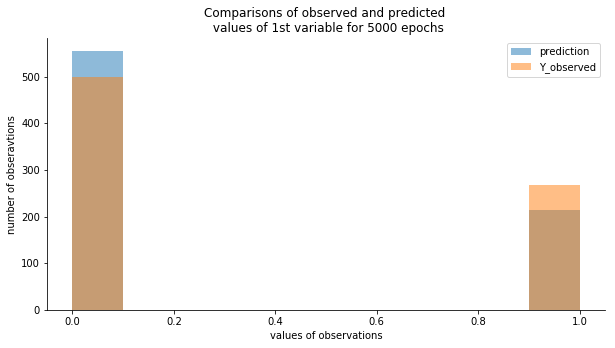

In [12]:
ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
ax.legend()
plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
ax.legend()
plt.xlabel("values of observations")
plt.ylabel("number of obseravtions")
plt.title("Comparisons of observed and predicted \n values of 1st variable for 5000 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# The prediction which are closer to 1's and 0's are plotted over 
# Y_observed. 85% are predicted close/equal to actual values
# and 15% are not.

## 20000 Epochs with default learning rate of 0.001 ----------------------------------------------------------------------

In [11]:
np.random.seed(7)
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
twenty_history = model.fit(X, Y, epochs=20000, verbose=0)
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('')
print('================')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 91us/step

acc: 84.77%

loss: 34.30%

Confusion Matrix
True negatives:  453
False negatives:  70
False positives:  47
True positives:  198


#### The accuracy and loss are unchanged for 5000 and 20000 epochs

[0.3429684154689312, 0.84765625]


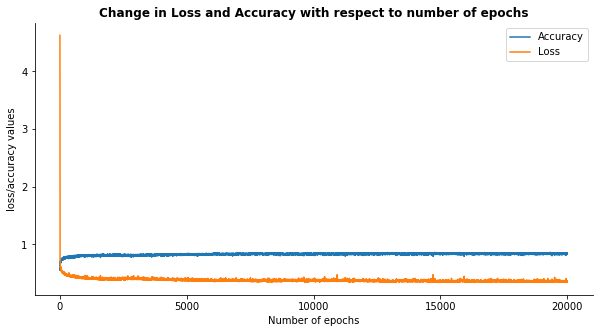

In [16]:
print(scores)
acc_twenty = twenty_history .history['acc']
loss_twenty = twenty_history .history['loss']
epoch = range(0,20000)
ax = plt.subplot(111)
ax.plot(acc_twenty, label="Accuracy")
plt.legend()
ax.plot(loss_twenty, label="Loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss/accuracy values")
plt.title("Change in Loss and Accuracy with respect to number of epochs",fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(np.arange(min(epoch), max(epoch)+2, 5000))
plt.show()
# accuracy is changed from 80% of 5k epochs to 84.77% of 20k epochs
# loss is changed from 41% of 5k epochs to 34% of 20k epochs

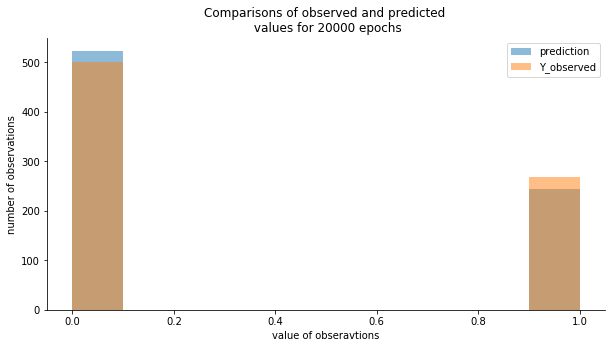

In [18]:
ax = plt.subplot(1,1,1)
plt.hist(y_pred,alpha=0.5,histtype='stepfilled',label="prediction")
ax.legend()
plt.hist(Y,alpha=0.5,histtype='stepfilled', label="Y_observed")
ax.legend()
plt.xlabel("value of obseravtions")
plt.ylabel("number of observations")
plt.title("Comparisons of observed and predicted \n values for 20000 epochs")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['figure.figsize'] = [10,5]
# The prediction which are closer to 1's and 0's are plotted over 
# Y_observed. 85% are predicted close/equal to actual values
# and 15% are not.

refrence:

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html 

https://keras.io/losses/